In [97]:
import matplotlib as mpl
# mpl.use('TkAgg') # Use this backend for displaying plots in window
# mpl.use('Agg') # Use this backend for writing plots to file

import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')
mpl.rcParams['figure.figsize'] = [16, 9]
mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Computer Modern Roman'
mpl.rcParams['lines.linewidth'] = 1.25
mpl.rcParams['lines.markersize'] = 6
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
import h5py
import sys
import os
import numpy as np
np.set_printoptions(threshold=sys.maxsize)

In [98]:
N = [64, 128, 256, 512]
# alpha = np.append(np.append(np.arange(0.0, 1.0, 0.05), np.arange(1.0, 2.0, 0.025)), np.arange(2.0, 2.5, 0.05))
alpha = np.arange(0.0, 3.5, 0.05)
print(alpha)


k0 = 1
beta = 0.0
iters = 400000
trans = 0
u0    = "ALIGNED"

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35
 1.4  1.45 1.5  1.55 1.6  1.65 1.7  1.75 1.8  1.85 1.9  1.95 2.   2.05
 2.1  2.15 2.2  2.25 2.3  2.35 2.4  2.45 2.5  2.55 2.6  2.65 2.7  2.75
 2.8  2.85 2.9  2.95 3.   3.05 3.1  3.15 3.2  3.25 3.3  3.35 3.4  3.45]


In [99]:
input_dir  = "/work/projects/TurbPhase/burgers_1d_code/Burgers_PO/Data/Output/LCE"
output_dir = "/work/projects/TurbPhase/burgers_1d_code/Burgers_PO/Data/Snapshots/Spectra"

In [138]:
num_pos_lce      = np.zeros((len(N), len(alpha)))
prop_pos_lce     = np.zeros((len(N), len(alpha)))
spectrum_sum     = np.zeros((len(N), len(alpha)))
kaplan_york_dim  = np.zeros((len(N), len(alpha)))
kaplan_york_dim_n = np.zeros((len(N), len(alpha)))

In [149]:
for n in range(0, len(N)):
    # n = 0
    spectra = np.zeros((len(alpha), int(N[n] / 2 - k0)))

    for a in range(0, len(alpha)):
        # a = 25 
                # Read in data
        filename = "/LCE_Runtime_Data_N[{}]_k0[{}]_ALPHA[{:0.3f}]_BETA[{:0.3f}]_u0[ALIGNED]_ITERS[{}].h5".format(N[n], k0, alpha[a], beta, iters)
        # filename = "/RESULTS_N[{}]_k0[{}]_ALPHA[{:0.3f}]_BETA[{:0.3f}]_u0[{}]/LCEData_ITERS[{}]_TRANS[{}].h5".format(N[n], k0, alpha[a], beta, u0, iters, trans)
        file     = h5py.File(input_dir + filename, 'r')

        # Extract LCE Data
        lce = file['LCE']

        # Extract final state
        spectrum = lce[-1, :]
        spectra[a, :] = spectrum

        # find the zero mode
        minval  = np.amin(np.absolute(spectrum))
        minindx = np.where(np.absolute(spectrum) == minval)
        minindx_el,  = minindx
        # Extract the zero mode
        non_zero_spectrum = np.delete(spectrum, minindx, 0)
        
#         print(minindx)

        #         # Get the number of positive and negative exponents
        #         pos_lce = np.extract(non_zero_spectrum > 0, non_zero_spectrum)
        #         neg_lce = np.extract(non_zero_spectrum < 0, non_zero_spectrum)

        #         # Get the proportion of positive
        #         num_pos_lce[n, a]  = len(pos_lce)
        #         prop_pos_lce[n, a] = len(pos_lce) / (len(pos_lce) + len(neg_lce))

        #         # find the sum of the spectrum
        #         spectrum_sum[n, a] = np.sum(spectrum)

        ## Kaplan-Yorke Dimension
        lcesum = 0.0;
        k_indx = int(0)
        for l in range(0, len(spectrum)):
            if (lcesum + spectrum[l]) > 0.0:
                lcesum += spectrum[l]
                k_indx += 1
            else:
                 break
        if minindx_el == 0:
            kaplan_york_dim[n, a] = 0.0;
        else:
            kaplan_york_dim[n, a]  = k_indx + (lcesum / np.absolute(spectrum[k_indx]))
        
        lcesum = 0.0;
        k_indx = int(0)
        for l in range(0, len(non_zero_spectrum)):
            if lcesum + non_zero_spectrum[l] > 0.0:
                lcesum += non_zero_spectrum[l]
                k_indx += 1
            else:
                 break   
        kaplan_york_dim_n[n, a]  = k_indx + (lcesum / np.absolute(non_zero_spectrum[k_indx]))
        
        
print(kaplan_york_dim[0, :])
print(kaplan_york_dim_n[0, :])

[30.81181893 30.80526627 30.67153637 30.45520387 30.17740382 29.81986073
 29.38459254 28.92021369 28.3848714  27.81670058 27.19150294 26.47511598
 25.75879788 24.8754408  23.97373384 22.93665937 21.66742809 20.20617039
 18.50362712 16.55292961 14.22036347 11.94995402  9.93621875  3.43259011
  0.          3.27569053  0.          0.          0.          0.
  6.47740786  8.93279922  8.83941665  8.66457375  8.4523225   8.14184853
  7.7047297   7.42543813  7.25390898  7.13009323  7.08755155  7.13455865
  7.12207203  7.19857993  7.26250997  7.30287536  7.30697684  7.25828837
  7.28806004  7.46016701  7.61098532  7.66455585  7.57837456  7.23053982
  7.8806535   7.68927541  7.0469444   5.97090901  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.        ]
[29.81137865 29.80485723 29.67100553 29.45466265 29.17714647 28.8193579
 28.38430114 27.91992921 27.38458457 26.81648722 26.19130516 25.47487022
 24.75857008 23.87532708 2

In [148]:
spectrum.sum()
print(spectrum[:-1].sum())
print(spectrum.shape)
len(spectrum)


print(kaplan_york_dim_n)
print(minindx)
(w, ) = minindx
print(minindx == 2)

-543.092267874334
(255,)
[[ 29.81137865  29.80485723  29.67100553  29.45466265  29.17714647
   28.8193579   28.38430114  27.91992921  27.38458457  26.81648722
   26.19130516  25.47487022  24.75857008  23.87532708  22.97344791
   21.93636762  20.66686181  19.20577404  17.50317249  15.55277687
   13.22108992  10.95414014   8.93977966   2.42947494   0.
    2.27522342   0.           0.           0.           0.
    5.51214866   7.95923163   7.86904137   7.65208266   7.46365396
    7.15852329   6.72705414   6.44988644   6.27968634   6.15745331
    6.11752653   6.16694555   6.15682701   6.23713328   6.30399751
    6.34845694   6.35719386   6.31214772   6.34659344   6.52531019
    6.68248383   6.74391995   6.66528741   6.32921659   6.99160675
    6.811634     6.1816178    4.73693577   0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [ 61.84167717  61.78252609  61.52664661  61.16043937  60.63944836
 

/home/ecarroll/ecpy/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


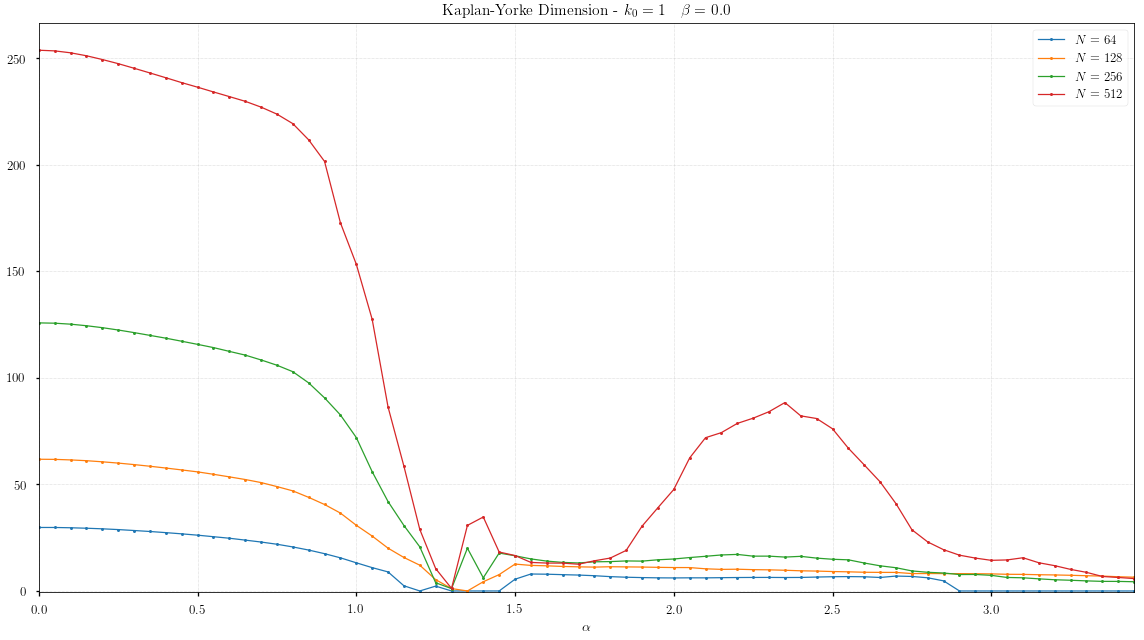

/home/ecarroll/ecpy/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


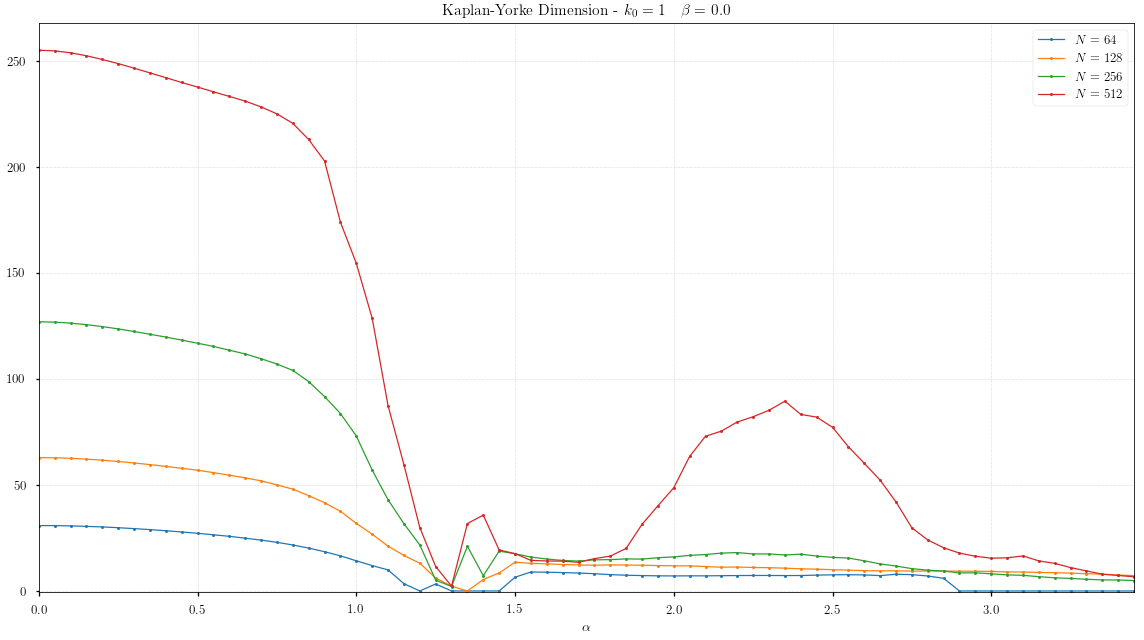

In [150]:
plt.figure()
for i in range(len(N)):
    plt.plot(alpha[:], kaplan_york_dim_n[i, :], '.-')
plt.xlim(alpha[0], alpha[-1])
plt.yscale('linear')
plt.grid(which = 'both', linestyle=':', linewidth='0.5', axis = 'both')
plt.xlabel(r"$\alpha$")
plt.gca().set_ylim(bottom = -0.5)
plt.title(r'Kaplan-Yorke Dimension - $k_0 = {} \quad \beta = {}$'.format(k0, beta))
plt.legend([r"$N = {val}$".format(val = nn) for nn in N])
plt.savefig("./KAPLANYORKE_LIN_ALPHA[VARIED]_BETA[{:0.3f}]_k0[{}]_ITERS[{}]_u0[{}]_n.pdf".format(beta, k0, iters, u0)) 
plt.savefig(output_dir + "/KAPLANYORKE_LIN_ALPHA[VARIED]_BETA[{:0.3f}]_k0[{}]_ITERS[{}]_u0[{}].pdf".format(beta, k0, iters, u0))  
# plt.savefig(output_dir + "/KAPLANYORKE_LIN_ALPHA[VARIED]_BETA[{:0.3f}]_k0[{}]_ITERS[{}].png".format(beta, k0, iters), format='png', dpi = 800)  
plt.show()

plt.figure()
for i in range(len(N)):
    plt.plot(alpha[:], kaplan_york_dim[i, :], '.-')
plt.xlim(alpha[0], alpha[-1])
plt.yscale('linear')
plt.grid(which = 'both', linestyle=':', linewidth='0.5', axis = 'both')
plt.xlabel(r"$\alpha$")
plt.gca().set_ylim(bottom = -0.5)
plt.title(r'Kaplan-Yorke Dimension - $k_0 = {} \quad \beta = {}$'.format(k0, beta))
plt.legend([r"$N = {val}$".format(val = nn) for nn in N])
plt.savefig("./KAPLANYORKE_LIN_ALPHA[VARIED]_BETA[{:0.3f}]_k0[{}]_ITERS[{}]_u0[{}].pdf".format(beta, k0, iters, u0)) 
plt.savefig(output_dir + "/KAPLANYORKE_LIN_ALPHA[VARIED]_BETA[{:0.3f}]_k0[{}]_ITERS[{}]_u0[{}].pdf".format(beta, k0, iters, u0))  
# plt.savefig(output_dir + "/KAPLANYORKE_LIN_ALPHA[VARIED]_BETA[{:0.3f}]_k0[{}]_ITERS[{}].png".format(beta, k0, iters), format='png', dpi = 800)  
plt.show()

In [78]:
print(spectrum)

[  1.79669273   1.15302212  -0.13315607  -0.60757256  -0.73532137
  -0.84533349  -0.93309013  -1.01631097  -1.06327143  -1.11209368
  -1.15366648  -1.18632076  -1.20423643  -1.22481146  -1.22855097
  -1.23466593  -1.2476906   -1.26616259  -1.28300073  -1.29933558
  -1.30924098  -1.32805071  -1.34402106  -1.3549421   -1.36503713
  -1.37878237  -1.38929862  -1.40556245  -1.41510221  -1.42434486
  -1.43592537  -1.4469737   -1.45615676  -1.46604069  -1.47607157
  -1.48514767  -1.49614076  -1.5076466   -1.51430981  -1.52425953
  -1.53484963  -1.54042481  -1.5480868   -1.55778112  -1.56626113
  -1.57663237  -1.58067837  -1.59158829  -1.59817263  -1.6054326
  -1.61237843  -1.62114457  -1.62767296  -1.63515546  -1.64053983
  -1.64907263  -1.65594507  -1.66313362  -1.66674206  -1.67348197
  -1.68045996  -1.68853836  -1.69475475  -1.7009011   -1.70658864
  -1.71307189  -1.7193512   -1.72714574  -1.73144488  -1.73802476
  -1.74330663  -1.74995363  -1.75428262  -1.7615263   -1.76598548
  -1.771130

In [79]:
print(non_zero_spectrum)

[  1.79669273   1.15302212  -0.60757256  -0.73532137  -0.84533349
  -0.93309013  -1.01631097  -1.06327143  -1.11209368  -1.15366648
  -1.18632076  -1.20423643  -1.22481146  -1.22855097  -1.23466593
  -1.2476906   -1.26616259  -1.28300073  -1.29933558  -1.30924098
  -1.32805071  -1.34402106  -1.3549421   -1.36503713  -1.37878237
  -1.38929862  -1.40556245  -1.41510221  -1.42434486  -1.43592537
  -1.4469737   -1.45615676  -1.46604069  -1.47607157  -1.48514767
  -1.49614076  -1.5076466   -1.51430981  -1.52425953  -1.53484963
  -1.54042481  -1.5480868   -1.55778112  -1.56626113  -1.57663237
  -1.58067837  -1.59158829  -1.59817263  -1.6054326   -1.61237843
  -1.62114457  -1.62767296  -1.63515546  -1.64053983  -1.64907263
  -1.65594507  -1.66313362  -1.66674206  -1.67348197  -1.68045996
  -1.68853836  -1.69475475  -1.7009011   -1.70658864  -1.71307189
  -1.7193512   -1.72714574  -1.73144488  -1.73802476  -1.74330663
  -1.74995363  -1.75428262  -1.7615263   -1.76598548  -1.77113026
  -1.77707

In [92]:
kaplan_york_dim[0, 27]
kaplan_york_dim_n[0, 27]

0.0

In [81]:
non_zero_spectrum.shape

(254,)

In [164]:
filename = "/LCE_Runtime_Data_N[{}]_k0[{}]_ALPHA[{:0.3f}]_BETA[{:0.3f}]_u0[ALIGNED]_ITERS[{}].h5".format(N[1], 1, 1.4, 0, iters)
print(filename)

/LCE_Runtime_Data_N[128]_k0[1]_ALPHA[1.400]_BETA[0.000]_u0[ALIGNED]_ITERS[400000].h5


In [168]:
file     = h5py.File(input_dir + filename, 'r')

# Extract LCE Data
lce = file['LCE']
print(lce[15:25, :])
print(kaplan_york_dim[1, 22:36])

[[  1.26454757   0.42728583  -0.61896963  -2.21096804  -3.46498003
   -4.65538372  -5.76970105  -6.85455761  -7.91466993  -8.94975656
   -9.96407087 -10.96310645 -11.9509127  -12.92653029 -13.86136891
  -14.6979193  -15.70723553 -16.17026819 -17.03982122 -17.50635529
  -18.57838625 -18.96732165 -19.73777579 -19.71545568 -19.79327407
  -21.29495999 -20.76286308 -21.847892   -21.86863935 -22.42132153
  -22.98650565 -23.66674803 -23.93675647 -24.1197801  -24.12249319
  -25.7967071  -25.51873993 -26.14935306 -26.29156512 -27.47580846
  -27.70293618 -28.44729325 -28.83684585 -29.52986016 -29.83345834
  -31.40276216 -31.6867845  -32.18923795 -32.44643995 -34.79857687
  -35.04150009 -35.90059758 -36.09981776 -39.08443594 -39.31478869
  -42.62625969 -42.63624018 -44.9689979  -45.20196478 -57.39242531
  -57.3207224  -97.42259283 -97.48360864]
 [  1.2258117    0.38943881  -0.61809768  -2.22601617  -3.48126698
   -4.67829352  -5.79832104  -6.88808262  -7.9525765   -8.99198398
  -10.0106248  -11.0

In [69]:
! h5dump -H ../Data/Output/LCE/LCE_Runtime_Data_N[64]_k0[1]_ALPHA[1.000]_BETA[0.000]_u0[ALIGNED]_ITERS[400000].h5

HDF5 "../Data/Output/LCE/LCE_Runtime_Data_N[64]_k0[1]_ALPHA[1.000]_BETA[0.000]_u0[ALIGNED]_ITERS[400000].h5" {
GROUP "/" {
   DATASET "Amps" {
      DATATYPE  H5T_IEEE_F64LE
      DATASPACE  SIMPLE { ( 1, 33 ) / ( 1, 33 ) }
   }
   DATASET "LCE" {
      DATATYPE  H5T_IEEE_F64LE
      DATASPACE  SIMPLE { ( 40000, 31 ) / ( H5S_UNLIMITED, 31 ) }
   }
   DATASET "PhaseOrderPhi" {
      DATATYPE  H5T_IEEE_F64LE
      DATASPACE  SIMPLE { ( 400001, 1 ) / ( 400001, 1 ) }
   }
   DATASET "PhaseOrderR" {
      DATATYPE  H5T_IEEE_F64LE
      DATASPACE  SIMPLE { ( 400001, 1 ) / ( 400001, 1 ) }
   }
   DATASET "Phases" {
      DATATYPE  H5T_IEEE_F64LE
      DATASPACE  SIMPLE { ( 400001, 33 ) / ( H5S_UNLIMITED, 33 ) }
   }
   DATASET "Time" {
      DATATYPE  H5T_IEEE_F64LE
      DATASPACE  SIMPLE { ( 400001, 1 ) / ( 400001, 1 ) }
   }
   DATASET "Triads" {
      DATATYPE  H5T_IEEE_F64LE
      DATASPACE  SIMPLE { ( 400001, 465 ) / ( H5S_UNLIMITED, 465 ) }
      ATTRIBUTE "Triad_Dims" {
         DATAT